In [1]:


import numpy as np 
import pandas as pd # data processing



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/water-potability/water_potability.csv


# Read dataset and print basic information

In [2]:
data=pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data['Potability'].unique()

array([0, 1])

## Data pre-processing

#### Finding Missing Values

In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
data.shape

(3276, 10)

# Print statistics

In [8]:
data[data['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [9]:
data[data['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


### Replacing Missing Values with any of the central Tendencies. I am choosing Mean

In [10]:
#data=data.dropna()
data = data.fillna(data.mean())

### Fraction of samples with label '1' (potable)

In [11]:
sum(data['Potability'] == 1)/len(data)

0.3901098901098901

In [12]:
cor=data.drop('Potability',axis=1).corr()

#### Correlation matrix


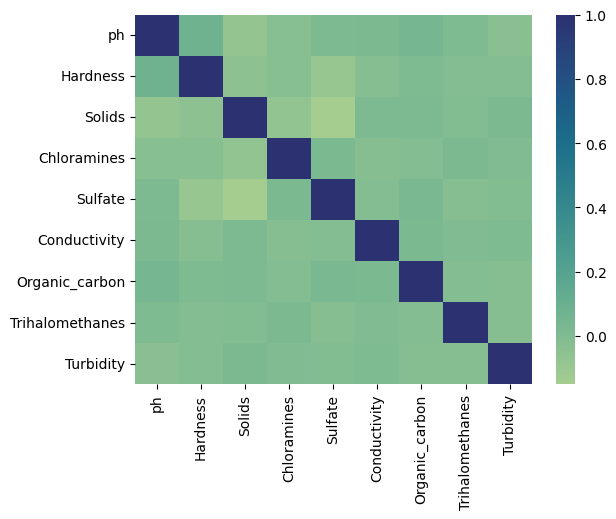

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor,annot=False,cmap="crest")
plt.show()

### Split into inputs and labels

In [14]:
X=data.drop('Potability',axis=1)
Y=data['Potability']

# Data normalization and standardization 

In [15]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

normalizer=MinMaxScaler()
standardizer=StandardScaler()
X= normalizer.fit_transform(X)
X=standardizer.fit_transform(X)

# Split into train, test, validation data

In [16]:
from sklearn.model_selection import train_test_split

train_ratio = 0.65
test_ratio = 0.2
validation_ratio = 0.15

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1-train_ratio,random_state=61)

X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


# Build, train and evaluate SVC and Random Forest models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    #'Random Forest': RandomForestClassifier(ccp_alpha=0.003),
}


for name, md in models.items():
    md.fit(np.concatenate((X_train,X_val)),np.concatenate((Y_train,Y_val)))
    ypred1 = md.predict(X_train)
    ypred2 = md.predict(X_test)
    
    print(f"{name}  with training accuracy : {accuracy_score(Y_train,ypred1)}")
    print(f"{name}  with test accuracy : {accuracy_score(Y_test,ypred2)}")

Support Vector Machine  with training accuracy : 0.7294504462188821
Support Vector Machine  with test accuracy : 0.6783536585365854
Random Forest  with training accuracy : 1.0
Random Forest  with test accuracy : 0.6661585365853658


# Build,train and evaluate Neural Network classifier

In [18]:
# baseline model
import tensorflow as tf
import keras_tuner
from keras.callbacks import ModelCheckpoint

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                               patience=30)

# 10, 4
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(1)
])




#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
 #   initial_learning_rate=1e-2,
  #  decay_steps=100000,
   # decay_rate=0.9)

opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.RMSprop()

model1.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(9,)),
        tf.keras.layers.Dense(hp.Choice('units1', [8,10,12]), activation='relu'),
        tf.keras.layers.Dropout(0),
        tf.keras.layers.Dense(hp.Choice('units2', [4,6,8]), activation='relu'),
        tf.keras.layers.Dropout(0),
        tf.keras.layers.Dense(1)
    ])
    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model


tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)
tuner.search_space_summary()
tuner.search(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val))
model = tuner.get_best_models()[0]
model.summary()

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)


history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200, batch_size=10, callbacks=[callback,mc], verbose=1)

# load a saved model
from keras.models import load_model
model = load_model('best_model.h5')


test_loss, test_acc = model.evaluate(X_test,  Y_test)

print('\nTest accuracy:', test_acc)

Trial 9 Complete [00h 00m 12s]
val_loss: 0.623813271522522

Best val_loss So Far: 0.6120835542678833
Total elapsed time: 00h 02m 01s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 12)                120       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 52        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 

# Confusion matrix

21/21 [==============================] - 0s 2ms/step
[[0.6753507  0.36942675]
 [0.3246493  0.63057325]]


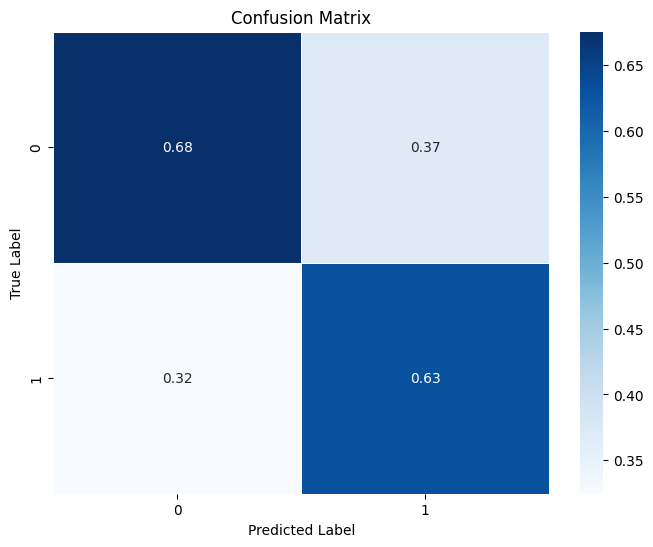

In [19]:
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(X_test) > 0
#y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(Y_test, y_prediction , normalize='pred')
print(result)
plt.figure(figsize=(8, 6))
sns.heatmap(result, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Use SHAP for feature importance analysis

In [20]:
import shap

shap.initjs()

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model.predict, X_train[1:100])
shap_values = explainer.shap_values(X_test[1:100], nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[1:100])


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


4/4 [==============================] - 0s 2ms/step


  0%|          | 0/99 [00:00<?, ?it/s]

310/310 [==============================] - 0s 2ms/step
